In [1]:
!pip install tensorflow-decision-forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv')
train_df.shape

(1460, 81)

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df = train_df.drop('Id', axis=1)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-8-bfc7a48e1624>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], color='green', bins=100, hist_kws={'alpha': 0.3})


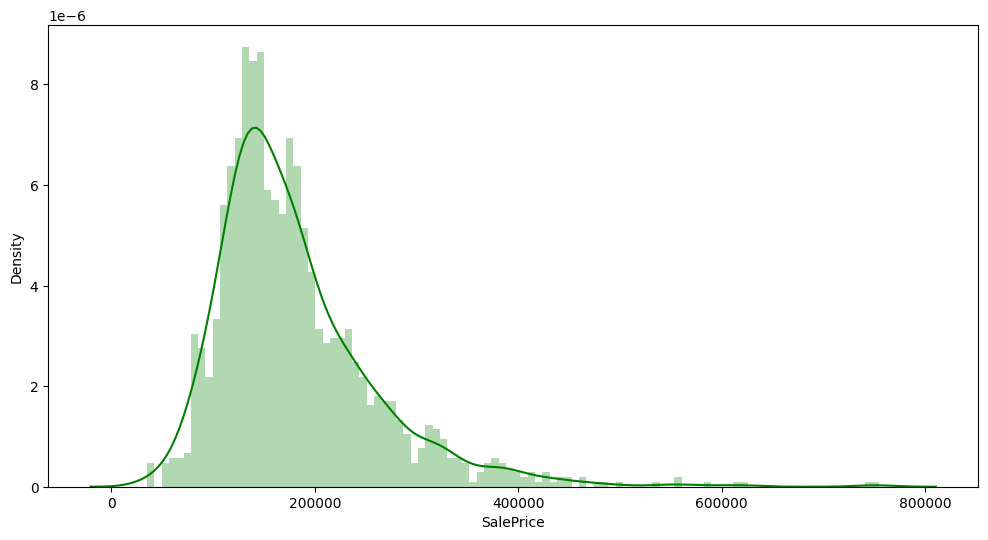

In [8]:
plt.figure(figsize=(12, 6))
sns.distplot(train_df['SalePrice'], color='green', bins=100, hist_kws={'alpha': 0.3})
plt.show()

In [9]:
list(set(train_df.dtypes))

[dtype('O'), dtype('float64'), dtype('int64')]

In [10]:
num_df = train_df.select_dtypes(include=['float64', 'int64'])
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

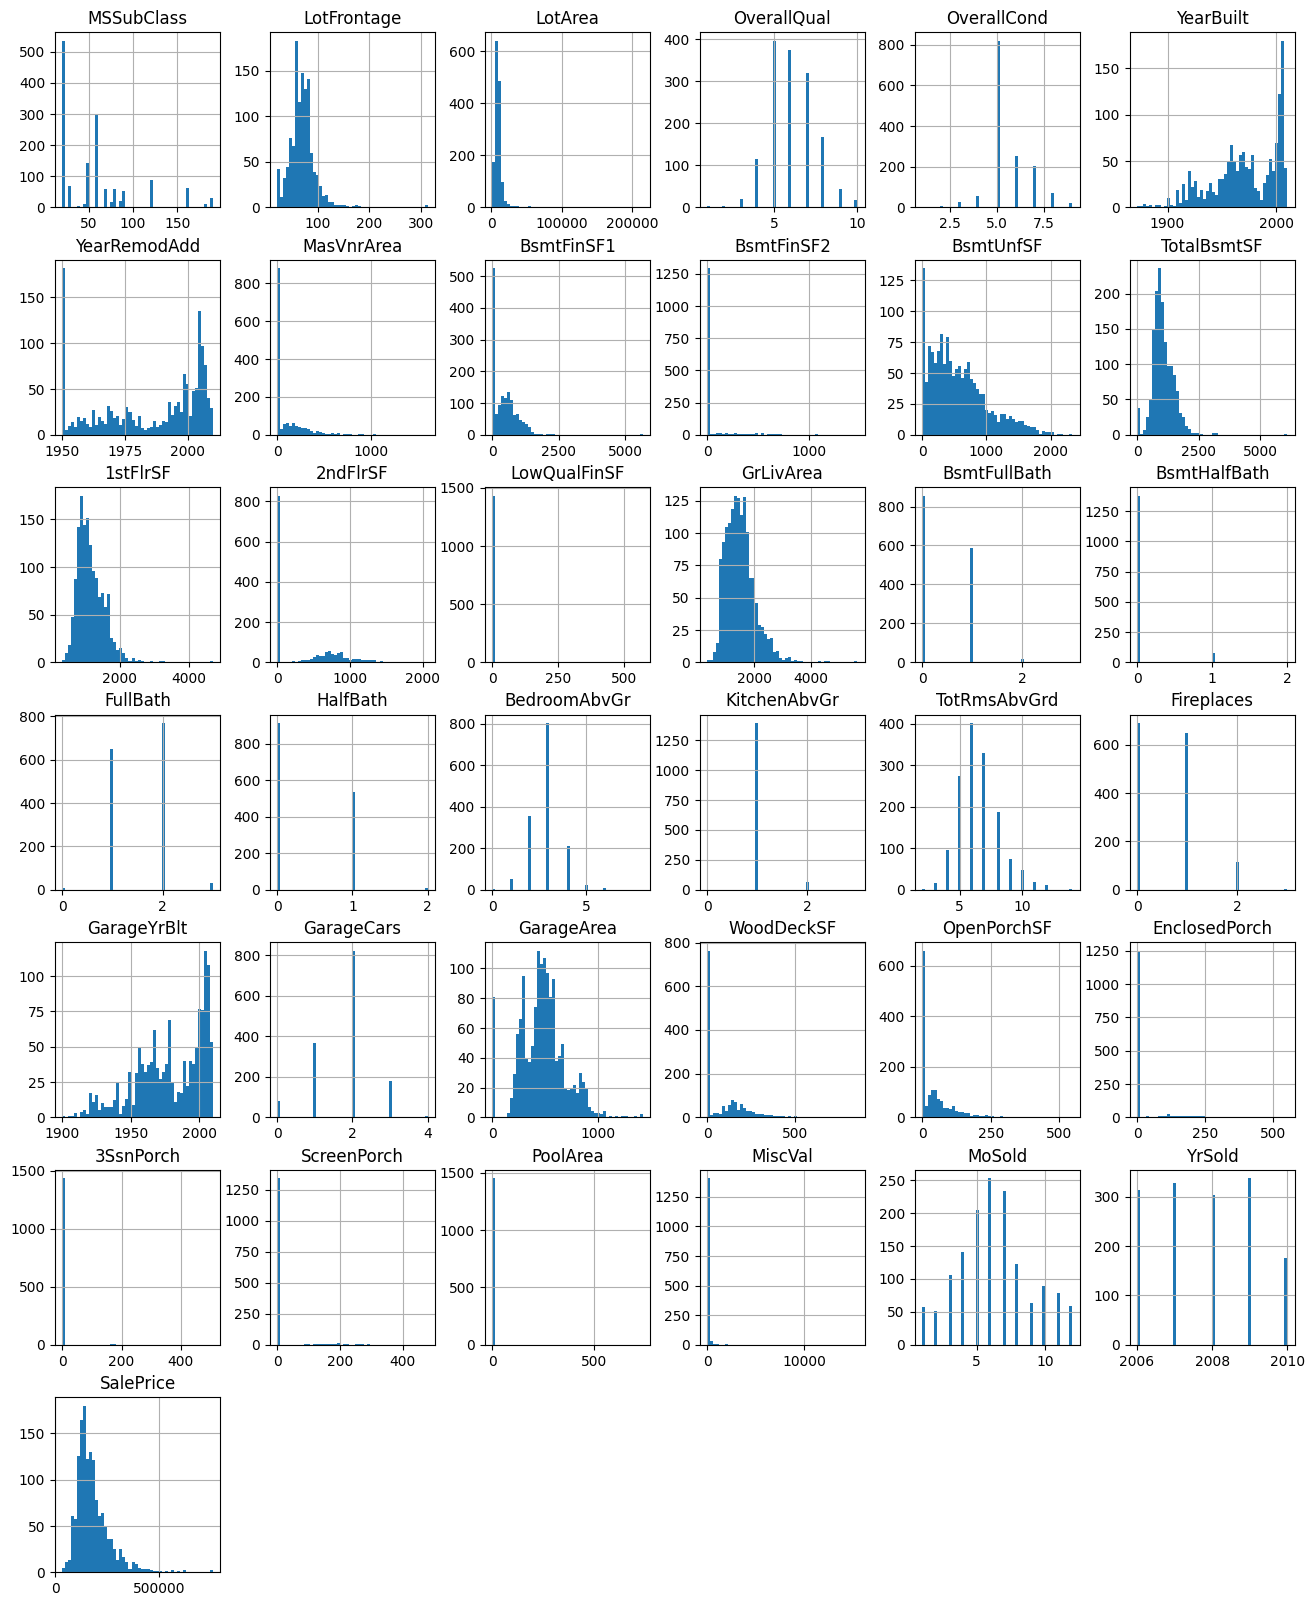

In [11]:
num_df.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10)

In [12]:
def split_dataset(dataset, test_ratio=0.30):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

split_train, split_test = split_dataset(train_df)
print(f'{len(split_train)} samples in training, {len(split_test)} samples in testing')

1001 samples in training, 459 samples in testing


In [13]:
label = 'SalePrice'
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(split_train, label=label, task=tfdf.keras.Task.REGRESSION)
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(split_test, label=label, task=tfdf.keras.Task.REGRESSION)

In [14]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [15]:
random_forest = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
random_forest.compile(metrics=['mse'])

Use /tmp/tmp7ak5pzi8 as temporary training directory


In [16]:
x = train_dataset
random_forest.fit(x)

Reading training dataset...
Training dataset read in 0:00:09.136579. Found 1001 examples.
Training model...
Model trained in 0:00:03.279727
Compiling model...
Model compiled.


In [17]:
tfdf.model_plotter.plot_model_in_colab(random_forest, tree_idx=0, max_depth=3)

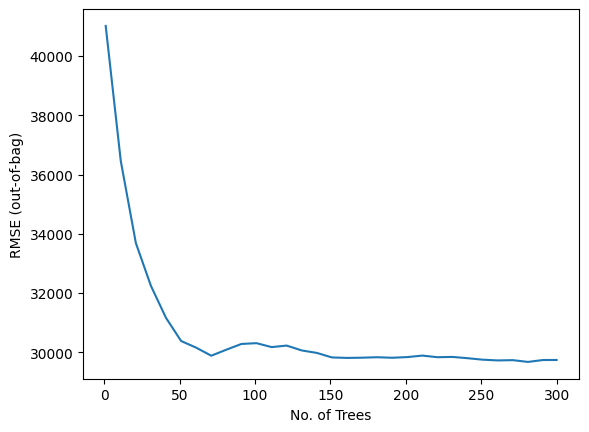

In [18]:
logs = random_forest.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel('No. of Trees')
plt.ylabel('RMSE (out-of-bag)')
plt.show()

In [19]:
inspector = random_forest.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1001, accuracy=None, loss=None, rmse=29741.28509141902, ndcg=None, aucs=None, auuc=None, qini=None)

In [20]:
evaluation = random_forest.evaluate(x=test_dataset, return_dict=True)

for name, value in evaluation.items():
    print(f'{name}: {value}')

1/1 [==============================] - 7s 7s/step - loss: 0.0000e+00 - mse: 727298752.0000
loss: 0.0
mse: 727298752.0


In [21]:
print(f'Available variable importance: ')
for importance in inspector.variable_importances().keys():
    print('\n', importance)

Available variable importance: 

 NUM_AS_ROOT

 INV_MEAN_MIN_DEPTH

 NUM_NODES

 SUM_SCORE


In [22]:
inspector.variable_importances()['NUM_AS_ROOT']

[("OverallQual" (1; #62), 113.0),
 ("ExterQual" (4; #22), 56.0),
 ("GarageCars" (1; #32), 42.0),
 ("Neighborhood" (4; #59), 35.0),
 ("GrLivArea" (1; #38), 16.0),
 ("BsmtQual" (4; #14), 9.0),
 ("GarageArea" (1; #31), 9.0),
 ("TotalBsmtSF" (1; #73), 9.0),
 ("YearBuilt" (1; #76), 4.0),
 ("KitchenQual" (4; #44), 3.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("BsmtFinSF1" (1; #8), 1.0),
 ("GarageYrBlt" (1; #37), 1.0)]

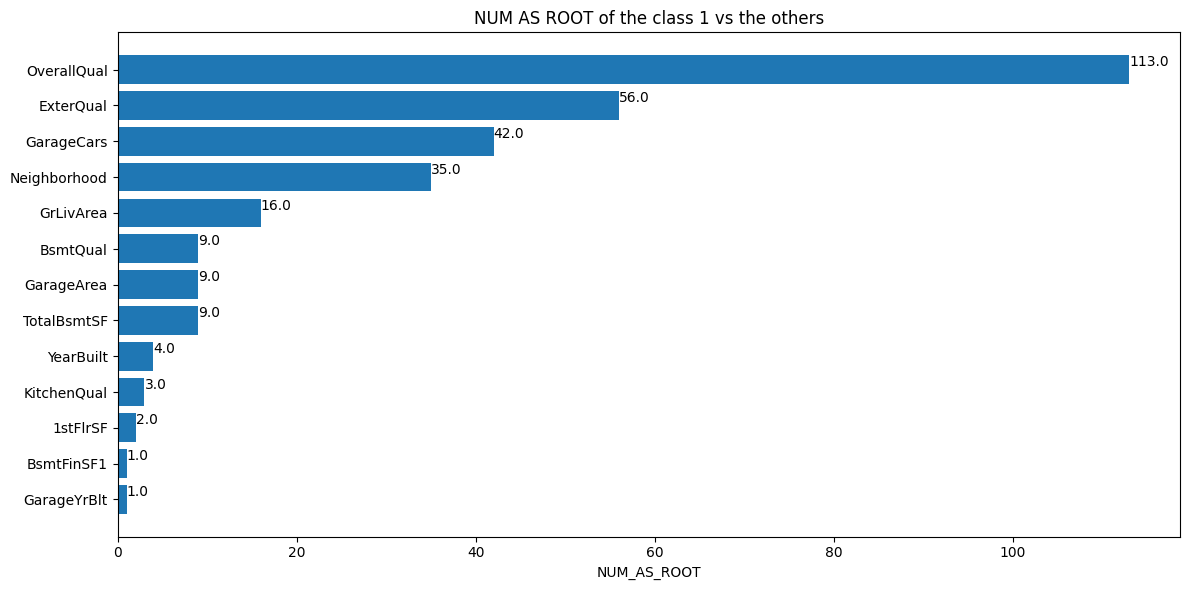

In [23]:
plt.figure(figsize=(12, 6))

variable_importance_metric = 'NUM_AS_ROOT'
variable_importances = inspector.variable_importances()[variable_importance_metric]

feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f'{importance:.1f}', va='top')

plt.xlabel(variable_importance_metric)
plt.title('NUM AS ROOT of the class 1 vs the others')
plt.tight_layout()
plt.show()

In [24]:
test_df = pd.read_csv('test.csv')
ids = test_df.pop('Id')

test_tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.REGRESSION)

predictions = random_forest.predict(test_tf_ds)
output = pd.DataFrame({'Id': ids, 'SalePrice': predictions.squeeze()})

output.head()

2/2 [==============================] - 2s 59ms/step


,Id,SalePrice
0,1461,127498.218750
1,1462,154881.265625
2,1463,184795.578125
3,1464,184890.781250
4,1465,194747.125000


In [25]:
submission_df = pd.read_csv('sample_submission.csv')
submission_df['SalePrice'] = predictions
submission_df.to_csv('submission.csv', index=False)
submission_df.head()

,Id,SalePrice
0,1461,127498.218750
1,1462,154881.265625
2,1463,184795.578125
3,1464,184890.781250
4,1465,194747.125000
